# Imports

In [2]:
import tensorflow as tf

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re

from wordcloud import WordCloud, STOPWORDS

# Analyzing the full dataset in order to extract features
This code counts which words were more likely to come up with depressed people v.s. healthy people, and also concatenates all of those words into one large string for the wordcloud to work. The original data was shuffled and stored in a new shuffled_tweets.csv file

In [3]:
    df = pd.read_csv("shuffled_tweets.csv")

    health_cloud = ""
    health_hash_cloud = ""
    health_counter = {}
    depressed_cloud = ""
    depressed_hash_cloud = ""
    depressed_counter = {}
    stopwords = set(STOPWORDS)

    for idx, val in enumerate(df.Message):
        #print(val,end=str(df["Label"][idx]))

        val = str(val)
        words = val.split()
        hash_words = []
        add_words = []
        for i in range(len(words)):
            if "#" in words[i]:
                hash_words.append(words[i].lower())


        if df["Label"][idx] == 0:
            health_cloud += " ".join(words)+" "
            health_hash_cloud += " ".join(hash_words)+" "
            for word in add_words:
                if word not in health_counter:
                    health_counter[word] = 1
                else:
                    health_counter[word] += 1
        else:
            depressed_cloud += " ".join(words)+" "
            depressed_hash_cloud += " ".join(hash_words)+" "
            for word in add_words:
                if word not in depressed_counter:
                    depressed_counter[word] = 1
                else:
                    depressed_counter[word] += 1    

# Most common words in healthy, non-depressed, tweets

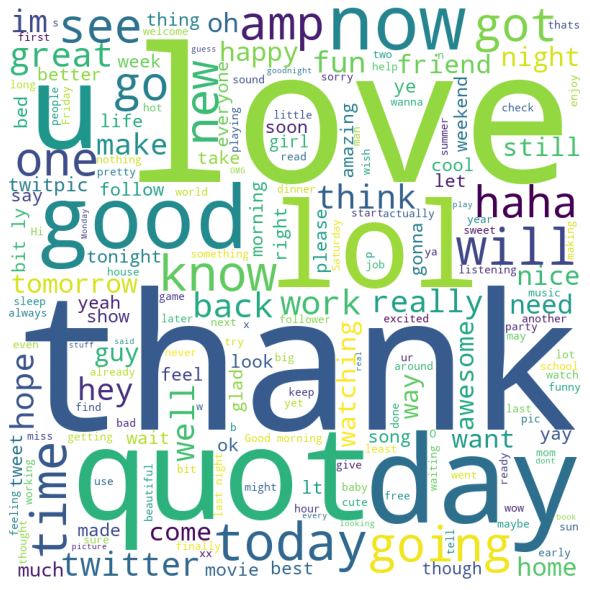

In [4]:
wordcloud = WordCloud(width=800, height=800,
                background_color='white',
                stopwords = STOPWORDS,
                min_font_size=10).generate(health_cloud)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Most common words in depressed tweets

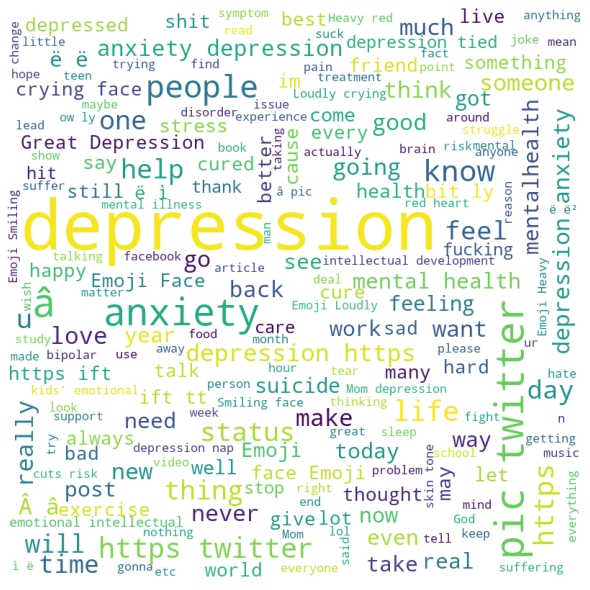

In [5]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(depressed_cloud)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Most common hashtags used by healthy people
An interesting consequence of this analysis was realizing the people diagnosed as healthy were much less likely to use hashtags than depressed people according to this dataset

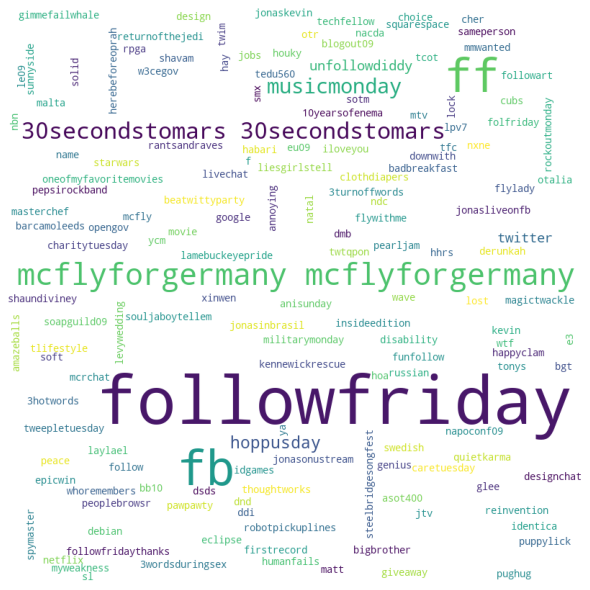

In [6]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(health_hash_cloud)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Most common hashtags used by depressed people

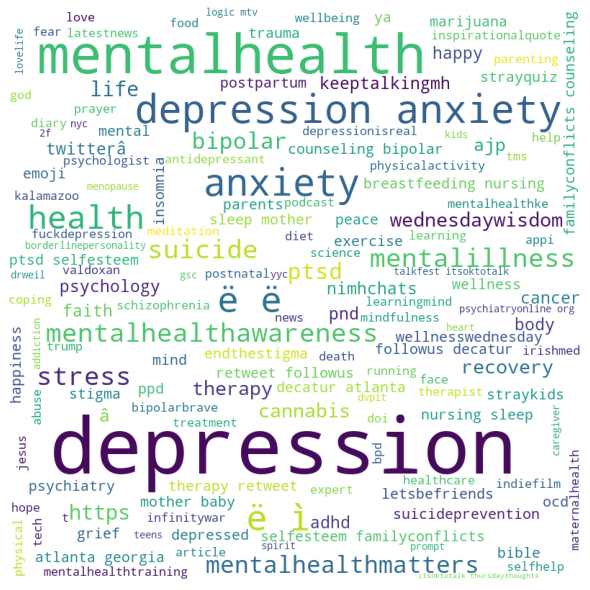

In [7]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(depressed_hash_cloud)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Feature Anaylsis
After analyzing the most common words and hashtags, I turned the occurances of the most common words and hashtags features. I also included features I found while manually looking tweets, including word length, character lenghth, the presence of links (usually to news outlets to describe an effect of depression), the amount of @mentions, and the percent of capitalized letters out of all letters (used to mimic screaming).

In [8]:
f = open("word_features.txt")

f_words = f.read()
f.close()
f_words.lower()
f_words = f_words.split("\n")
f_words = set(f_words)
word_features = []

sentance = "The Home Office rejected and rejected and rejected...I entered a phase of total depression...We told them all this in 2014! Why didn't they listen? Sam, 41 years in the UK from Sierra Leone #HostileEnvironment #LegalAid #IndependentReview #migrantvoices https://www.theguardian.com/commentisfree/2018/apr/25/windrush-scandal-immigration-legal-aidÂ â¦"

f = open("hashtag_features.txt")

f_hashs = f.read()
f.close()
f_hashs.lower()
f_hashs = f_hashs.split("\n")
f_hashs = set(f_hashs)
hash_features = []

def extract_features(sentance):
    word_features = []
    hash_features = []
    #Words cover punctuation 
    for word in sorted(f_words):
        #print(word,sentance.count(word))
        word_features.append(sentance.count(word))

    
    word_features.append(sentance.count(" bit.ly"))
    word_features.append(sentance.count(" https://")+sentance.count(" http://"))
    word_features.append(sentance.count(" https://twitter")+sentance.count(" http://twitter"))


    for hashtag in sorted(f_hashs):
        hash_features.append(sentance.count(hashtag))

    misc_features = []

    #Character Length
    misc_features.append(len(sentance))
    #Word Length
    misc_features.append(sentance.count(" "))
    #Number of hashtags total
    misc_features.append(sentance.count(" #"))
    #Number of @'s
    misc_features.append(sentance.count(" @"))
    nascii = 0
    nalpha = 0
    ncaps = 0
    for char in sentance:
        x = ord(char)
        if x > 127:
             nascii += 1
        elif (x > 64 and x < 91) or (x > 96 and x < 123):
            nalpha += 1
            if (x > 64 and x < 91):
                ncaps += 1
    #Number of non-ascii characters 
    misc_features.append(nascii)
    #Number of letters
   
    misc_features.append(nalpha)
    #Number of letters capitalized
    misc_features.append(ncaps)
    #Number of quotation marks, modified for two naming conventions
    misc_features.append(sentance.count("\"")+sentance.count("quot"))



    return np.asarray(word_features + hash_features + misc_features)

# An example of a feature vector taken from the words Hello World

In [9]:
extract_features("Hello World!!!!!!!!")
# Notes: Do ppl know they're being looked at
# Q to consider: how much does it matter limited to text
# Could do covid impact analysis of covid
    # What causes the depression, use something like this to identify the change of covid on people's lockdown
    # v. important
    # could expand to unsupervised! to go into unlabeled data
    # websites/anything related to depression could be trained to differntiate between the two
        # With tweets, not just academic be something new
        # Where are kids
    # give examples on how we speak on certain things and learn how to differentiate with k means?

array([20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

### Defining important variables to use 

In [10]:
# No. of training examples
m = 5999
# No. of features
n = 358

# Turning the training set into training features and feature normalization

In [11]:
train_df = pd.read_csv("training_set.csv",index_col=0)

train_arrays = []

for idx,val in enumerate(train_df.Message):
    train_arrays.append(extract_features(val))

train_data = np.reshape(np.concatenate(train_arrays, axis=-1),(m,n))
xmax = train_data.max(axis=0)
temp_data = np.zeros((m,n))

#Normalizing in a very slow manner 
for i in range(m):
    for j in range(n):
        if (xmax[j] == 0):
            temp_data[i,j] = 0
        else:
            temp_data[i,j] = round(train_data[i,j] / xmax[j],4)
        
train_data = temp_data

In [12]:
train_labels = []
for label in train_df.Label:
    train_labels.append(label)

train_labels = np.asarray(train_labels)


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(n,)),
    tf.keras.layers.Dense(128, activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(train_data, train_labels, epochs=100)

Epoch 1/100
188/188 [==============================] - 1s 1ms/step - loss: 0.4741 - accuracy: 0.7846
Epoch 2/100
188/188 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 0.8605
Epoch 3/100
188/188 [==============================] - 0s 1ms/step - loss: 0.2833 - accuracy: 0.8985
Epoch 4/100
188/188 [==============================] - 0s 1ms/step - loss: 0.2440 - accuracy: 0.9123
Epoch 5/100
188/188 [==============================] - 0s 1ms/step - loss: 0.2172 - accuracy: 0.9268
Epoch 6/100
188/188 [==============================] - 0s 1ms/step - loss: 0.2014 - accuracy: 0.9377
Epoch 7/100
188/188 [==============================] - 0s 1ms/step - loss: 0.1876 - accuracy: 0.9432
Epoch 8/100
188/188 [==============================] - 0s 1ms/step - loss: 0.1792 - accuracy: 0.9445
Epoch 9/100
188/188 [==============================] - 0s 1ms/step - loss: 0.1724 - accuracy: 0.9477
Epoch 10/100
188/188 [==============================] - 0s 1ms/step - loss: 0.1669 - accura

188/188 [==============================] - 0s 1ms/step - loss: 0.1280 - accuracy: 0.9557
Epoch 82/100
188/188 [==============================] - 0s 1ms/step - loss: 0.1277 - accuracy: 0.9565
Epoch 83/100
188/188 [==============================] - 0s 1ms/step - loss: 0.1273 - accuracy: 0.9535
Epoch 84/100
188/188 [==============================] - 0s 1ms/step - loss: 0.1266 - accuracy: 0.9548
Epoch 85/100
188/188 [==============================] - 0s 1ms/step - loss: 0.1271 - accuracy: 0.9547
Epoch 86/100
188/188 [==============================] - 0s 1ms/step - loss: 0.1267 - accuracy: 0.9547
Epoch 87/100
188/188 [==============================] - 0s 1ms/step - loss: 0.1262 - accuracy: 0.9568
Epoch 88/100
188/188 [==============================] - 0s 1ms/step - loss: 0.1264 - accuracy: 0.9568
Epoch 89/100
188/188 [==============================] - 0s 1ms/step - loss: 0.1272 - accuracy: 0.9565
Epoch 90/100
188/188 [==============================] - 0s 1ms/step - loss: 0.1268 - accuracy: 

In [15]:
t_m = 2000

test_df = pd.read_csv("test_set.csv",index_col=0)

test_arrays = []

for idx,val in enumerate(test_df.Message):
    test_arrays.append(extract_features(val))

test_data = np.reshape(np.concatenate(test_arrays, axis=-1),(t_m,n))
test_max = test_data.max(axis=0)
temp_data = np.zeros((t_m,n))

#Normalizing in a very slow manner 
for i in range(t_m):
    for j in range(n):
        if (test_max[j] == 0):
            temp_data[i,j] = 0
        else:
            temp_data[i,j] = round(test_data[i,j] / test_max[j],4)
        
test_data = temp_data


test_labels = []
for label in test_df.Label:
    test_labels.append(label)

test_labels = np.asarray(test_labels)


# First accuracy of 92.75%

In [16]:
test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

63/63 - 0s - loss: 0.3205 - accuracy: 0.9265 - 173ms/epoch - 3ms/step

Test accuracy: 0.9265000224113464


# Plotting learning curves
I need to plot the learning curves of my algorithm to see if my algorithm is overfitting or underfitting the data so I can plan what to do next

In [17]:
cv_m = 2000

cv_df = pd.read_csv("cross_validation_set.csv",index_col=0)

cv_arrays = []

for idx,val in enumerate(cv_df.Message):
    cv_arrays.append(extract_features(val))

cv_data = np.reshape(np.concatenate(cv_arrays, axis=-1),(cv_m,n))
cv_max = cv_data.max(axis=0)
temp_data = np.zeros((cv_m,n))

#Normalizing in a very slow manner 
for i in range(cv_m):
    for j in range(n):
        if (cv_max[j] == 0):
            temp_data[i,j] = 0
        else:
            temp_data[i,j] = round(cv_data[i,j] / cv_max[j],4)
        
cv_data = temp_data

cv_labels = []
for label in cv_df.Label:
    cv_labels.append(label)

cv_labels = np.asarray(cv_labels)


In [78]:
learning_iterations = 100

In [79]:
cv_acc_list = []
train_acc_list = []
for i in range(1,learning_iterations):
    learning_model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(358,)),
        tf.keras.layers.Dense(128, activation=tf.keras.activations.sigmoid),
        tf.keras.layers.Dense(2)
    ])

    learning_model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    learning_model.fit(train_data[0:i], train_labels[0:i], epochs=100)
    
    cv_loss, cv_acc = learning_model.evaluate(cv_data,  cv_labels, verbose=2)
    train_loss, train_acc = learning_model.evaluate(train_data[0:i], train_labels[0:i], verbose=2)
    print('\nTest accuracy:', cv_acc)
    cv_acc_list.append(cv_acc)
    train_acc_list.append(train_acc)

Epoch 1/100
1/1 [==============================] - 0s 224ms/step - loss: 0.1199 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1042 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0905 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0787 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0685 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0456 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 1.0000
Epoch 11/100
1/1 [=========

1/1 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 85/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 86/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 87/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 88/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 89/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 90/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 91/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 92/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 93/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 94/100
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 1.0000
Epoch 67/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 1.0000
Epoch 68/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 1.0000
Epoch 69/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 70/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 1.0000
Epoch 71/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 1.0000
Epoch 75/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 76/100
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 49/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 50/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 51/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 52/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 1.0000
Epoch 53/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 54/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 55/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0082 - accuracy: 1.0000
Epoch 56/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 57/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 58/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.0289 - accuracy: 1.0000
Epoch 31/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0273 - accuracy: 1.0000
Epoch 32/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0259 - accuracy: 1.0000
Epoch 33/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0246 - accuracy: 1.0000
Epoch 34/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 1.0000
Epoch 35/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 1.0000
Epoch 36/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 1.0000
Epoch 37/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0205 - accuracy: 1.0000
Epoch 38/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 1.0000
Epoch 39/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 1.0000
Epoch 40/100
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.8000
Epoch 13/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4798 - accuracy: 0.8000
Epoch 14/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4789 - accuracy: 0.8000
Epoch 15/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4788 - accuracy: 0.8000
Epoch 16/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4793 - accuracy: 0.8000
Epoch 17/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.8000
Epoch 18/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.8000
Epoch 19/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.8000
Epoch 20/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.8000
Epoch 21/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.8000
Epoch 22/100
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.3655 - accuracy: 0.8000
Epoch 96/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3640 - accuracy: 0.8000
Epoch 97/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3625 - accuracy: 0.8000
Epoch 98/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3610 - accuracy: 0.8000
Epoch 99/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3594 - accuracy: 0.8000
Epoch 100/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3579 - accuracy: 0.8000
63/63 - 0s - loss: 0.5608 - accuracy: 0.7745 - 150ms/epoch - 2ms/step
1/1 - 0s - loss: 0.3563 - accuracy: 0.8000 - 15ms/epoch - 15ms/step

Test accuracy: 0.7745000123977661
Epoch 1/100
1/1 [==============================] - 0s 238ms/step - loss: 0.6395 - accuracy: 0.6667
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6364 - accuracy: 0.6667
Epoch 3/100
1/1 [==============================] - 0s 4

1/1 [==============================] - 0s 3ms/step - loss: 0.3370 - accuracy: 0.8333
Epoch 78/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3329 - accuracy: 0.8333
Epoch 79/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3288 - accuracy: 0.8333
Epoch 80/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8333
Epoch 81/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3207 - accuracy: 0.8333
Epoch 82/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8333
Epoch 83/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3127 - accuracy: 0.8333
Epoch 84/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3088 - accuracy: 0.8333
Epoch 85/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3049 - accuracy: 0.8333
Epoch 86/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3011 - accuracy: 0.8333
Epoch 87/100
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.4916 - accuracy: 0.7143
Epoch 60/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4895 - accuracy: 0.7143
Epoch 61/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4874 - accuracy: 0.7143
Epoch 62/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4853 - accuracy: 0.7143
Epoch 63/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4831 - accuracy: 0.7143
Epoch 64/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4810 - accuracy: 0.7143
Epoch 65/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4788 - accuracy: 0.7143
Epoch 66/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4767 - accuracy: 0.7143
Epoch 67/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4745 - accuracy: 0.7143
Epoch 68/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4724 - accuracy: 0.7143
Epoch 69/100
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.4375 - accuracy: 0.7500
Epoch 42/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4337 - accuracy: 0.7500
Epoch 43/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4299 - accuracy: 0.7500
Epoch 44/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4261 - accuracy: 0.7500
Epoch 45/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4222 - accuracy: 0.7500
Epoch 46/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4183 - accuracy: 0.7500
Epoch 47/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4144 - accuracy: 0.8750
Epoch 48/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.8750
Epoch 49/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4065 - accuracy: 0.8750
Epoch 50/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4026 - accuracy: 0.8750
Epoch 51/100
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.5968 - accuracy: 0.6667
Epoch 24/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5953 - accuracy: 0.6667
Epoch 25/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5932 - accuracy: 0.6667
Epoch 26/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5905 - accuracy: 0.6667
Epoch 27/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5873 - accuracy: 0.6667
Epoch 28/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5838 - accuracy: 0.6667
Epoch 29/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5799 - accuracy: 0.6667
Epoch 30/100
1/1 [==============================] - 0s 2ms/step - loss: 0.5759 - accuracy: 0.6667
Epoch 31/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5718 - accuracy: 0.6667
Epoch 32/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5678 - accuracy: 0.6667
Epoch 33/100
1/1 [===============

Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.3000
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6697 - accuracy: 0.9000
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6448 - accuracy: 0.7000
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6248 - accuracy: 0.7000
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.7000
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5977 - accuracy: 0.7000
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5896 - accuracy: 0.7000
Epoch 12/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5844 - accuracy: 0.7000
Epoch 13/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5815 - accuracy: 0.7000
Epoch 14/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5802 - accuracy: 0.7000
Epoch 15/100
1/1 [=======

1/1 [==============================] - 0s 4ms/step - loss: 0.4309 - accuracy: 0.8000
Epoch 89/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4289 - accuracy: 0.8000
Epoch 90/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4269 - accuracy: 0.8000
Epoch 91/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8000
Epoch 92/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.8000
Epoch 93/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4209 - accuracy: 0.8000
Epoch 94/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4189 - accuracy: 0.8000
Epoch 95/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4169 - accuracy: 0.9000
Epoch 96/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4149 - accuracy: 0.9000
Epoch 97/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4129 - accuracy: 0.9000
Epoch 98/100
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.3972 - accuracy: 0.8182
Epoch 71/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3937 - accuracy: 0.8182
Epoch 72/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3902 - accuracy: 0.8182
Epoch 73/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3867 - accuracy: 0.8182
Epoch 74/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3831 - accuracy: 0.8182
Epoch 75/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3796 - accuracy: 0.8182
Epoch 76/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.9091
Epoch 77/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3725 - accuracy: 0.9091
Epoch 78/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3689 - accuracy: 0.9091
Epoch 79/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3653 - accuracy: 0.9091
Epoch 80/100
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.4568 - accuracy: 0.8333
Epoch 53/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4532 - accuracy: 0.8333
Epoch 54/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4497 - accuracy: 0.8333
Epoch 55/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4461 - accuracy: 0.8333
Epoch 56/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4426 - accuracy: 0.8333
Epoch 57/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4391 - accuracy: 0.8333
Epoch 58/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4355 - accuracy: 0.8333
Epoch 59/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4320 - accuracy: 0.8333
Epoch 60/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4284 - accuracy: 0.8333
Epoch 61/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4248 - accuracy: 0.8333
Epoch 62/100
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.5200 - accuracy: 0.6923
Epoch 35/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5168 - accuracy: 0.6923
Epoch 36/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5135 - accuracy: 0.6923
Epoch 37/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5101 - accuracy: 0.6923
Epoch 38/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5067 - accuracy: 0.6923
Epoch 39/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5034 - accuracy: 0.6923
Epoch 40/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5000 - accuracy: 0.7692
Epoch 41/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4967 - accuracy: 0.7692
Epoch 42/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4933 - accuracy: 0.7692
Epoch 43/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4900 - accuracy: 0.7692
Epoch 44/100
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.5450 - accuracy: 0.7143
Epoch 17/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5420 - accuracy: 0.7143
Epoch 18/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5389 - accuracy: 0.7143
Epoch 19/100
1/1 [==============================] - 0s 2ms/step - loss: 0.5358 - accuracy: 0.7143
Epoch 20/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5326 - accuracy: 0.7143
Epoch 21/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5295 - accuracy: 0.7143
Epoch 22/100
1/1 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.7143
Epoch 23/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5233 - accuracy: 0.7143
Epoch 24/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5202 - accuracy: 0.7143
Epoch 25/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5170 - accuracy: 0.7143
Epoch 26/100
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.2469 - accuracy: 0.9286
Epoch 100/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2439 - accuracy: 0.9286
63/63 - 0s - loss: 0.4360 - accuracy: 0.8195 - 165ms/epoch - 3ms/step
1/1 - 0s - loss: 0.2411 - accuracy: 0.9286 - 24ms/epoch - 24ms/step

Test accuracy: 0.8195000290870667
Epoch 1/100
1/1 [==============================] - 0s 282ms/step - loss: 0.9728 - accuracy: 0.2667
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 0.9133 - accuracy: 0.2667
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 0.8583 - accuracy: 0.2667
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.8080 - accuracy: 0.2667
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.7626 - accuracy: 0.2667
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.7223 - accuracy: 0.2667
Epoch 7/100
1/1 [==============================] - 0s 3ms/s

1/1 [==============================] - 0s 3ms/step - loss: 0.4139 - accuracy: 0.8000
Epoch 82/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4119 - accuracy: 0.8000
Epoch 83/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4100 - accuracy: 0.8000
Epoch 84/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8000
Epoch 85/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4062 - accuracy: 0.8000
Epoch 86/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4042 - accuracy: 0.8000
Epoch 87/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4023 - accuracy: 0.8000
Epoch 88/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4004 - accuracy: 0.8000
Epoch 89/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3985 - accuracy: 0.8000
Epoch 90/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3967 - accuracy: 0.8000
Epoch 91/100
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.8125
Epoch 64/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4285 - accuracy: 0.8125
Epoch 65/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4265 - accuracy: 0.8125
Epoch 66/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4245 - accuracy: 0.8125
Epoch 67/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4225 - accuracy: 0.8125
Epoch 68/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4205 - accuracy: 0.8125
Epoch 69/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4184 - accuracy: 0.8125
Epoch 70/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4164 - accuracy: 0.8125
Epoch 71/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4144 - accuracy: 0.8125
Epoch 72/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8125
Epoch 73/100
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.4667 - accuracy: 0.7647
Epoch 46/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4643 - accuracy: 0.7647
Epoch 47/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4620 - accuracy: 0.7647
Epoch 48/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4598 - accuracy: 0.7647
Epoch 49/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4577 - accuracy: 0.7647
Epoch 50/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4557 - accuracy: 0.7647
Epoch 51/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4538 - accuracy: 0.7647
Epoch 52/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4519 - accuracy: 0.7647
Epoch 53/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4500 - accuracy: 0.7647
Epoch 54/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy: 0.7647
Epoch 55/100
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.4689 - accuracy: 0.7778
Epoch 28/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4669 - accuracy: 0.7778
Epoch 29/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4651 - accuracy: 0.7778
Epoch 30/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4633 - accuracy: 0.7778
Epoch 31/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4615 - accuracy: 0.7778
Epoch 32/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4596 - accuracy: 0.7778
Epoch 33/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4575 - accuracy: 0.7778
Epoch 34/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4554 - accuracy: 0.7778
Epoch 35/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4531 - accuracy: 0.7778
Epoch 36/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4508 - accuracy: 0.7778
Epoch 37/100
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.5403 - accuracy: 0.7895
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.7895
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5163 - accuracy: 0.7895
Epoch 12/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5088 - accuracy: 0.7895
Epoch 13/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5036 - accuracy: 0.7895
Epoch 14/100
1/1 [==============================] - 0s 2ms/step - loss: 0.5002 - accuracy: 0.7895
Epoch 15/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4981 - accuracy: 0.7895
Epoch 16/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4969 - accuracy: 0.7895
Epoch 17/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4963 - accuracy: 0.7895
Epoch 18/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4961 - accuracy: 0.7895
Epoch 19/100
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.3568 - accuracy: 0.8421
Epoch 93/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3552 - accuracy: 0.8421
Epoch 94/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3535 - accuracy: 0.8421
Epoch 95/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3519 - accuracy: 0.8421
Epoch 96/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3502 - accuracy: 0.8421
Epoch 97/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3486 - accuracy: 0.8421
Epoch 98/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3469 - accuracy: 0.8421
Epoch 99/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3453 - accuracy: 0.8421
Epoch 100/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3437 - accuracy: 0.8421
63/63 - 0s - loss: 0.4836 - accuracy: 0.7755 - 140ms/epoch - 2ms/step
1/1 - 0s - loss: 0.3420 - accuracy: 0.8421 - 14ms/epoch - 14

1/1 [==============================] - 0s 3ms/step - loss: 0.3657 - accuracy: 0.8000
Epoch 75/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3639 - accuracy: 0.8000
Epoch 76/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3621 - accuracy: 0.8500
Epoch 77/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3603 - accuracy: 0.8500
Epoch 78/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3585 - accuracy: 0.8500
Epoch 79/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3567 - accuracy: 0.8500
Epoch 80/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3548 - accuracy: 0.8500
Epoch 81/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3530 - accuracy: 0.8500
Epoch 82/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3512 - accuracy: 0.8500
Epoch 83/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3494 - accuracy: 0.8500
Epoch 84/100
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.3716 - accuracy: 0.8095
Epoch 57/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3692 - accuracy: 0.8095
Epoch 58/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3668 - accuracy: 0.8095
Epoch 59/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3643 - accuracy: 0.8095
Epoch 60/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3619 - accuracy: 0.8095
Epoch 61/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3594 - accuracy: 0.8571
Epoch 62/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.8571
Epoch 63/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3544 - accuracy: 0.8571
Epoch 64/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3519 - accuracy: 0.8571
Epoch 65/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3494 - accuracy: 0.8571
Epoch 66/100
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.4047 - accuracy: 0.8182
Epoch 39/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4031 - accuracy: 0.8182
Epoch 40/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4014 - accuracy: 0.8182
Epoch 41/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3997 - accuracy: 0.8182
Epoch 42/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3979 - accuracy: 0.8182
Epoch 43/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3961 - accuracy: 0.8182
Epoch 44/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3942 - accuracy: 0.8182
Epoch 45/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3923 - accuracy: 0.8182
Epoch 46/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3903 - accuracy: 0.8182
Epoch 47/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3883 - accuracy: 0.8182
Epoch 48/100
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.4268 - accuracy: 0.8261
Epoch 21/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4247 - accuracy: 0.8261
Epoch 22/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4226 - accuracy: 0.8261
Epoch 23/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4204 - accuracy: 0.8261
Epoch 24/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4182 - accuracy: 0.8261
Epoch 25/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4161 - accuracy: 0.8261
Epoch 26/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8261
Epoch 27/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8261
Epoch 28/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4098 - accuracy: 0.8261
Epoch 29/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4076 - accuracy: 0.8261
Epoch 30/100
1/1 [===============

Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6670 - accuracy: 0.7917
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6298 - accuracy: 0.7917
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5978 - accuracy: 0.7917
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5708 - accuracy: 0.7917
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5487 - accuracy: 0.7917
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5310 - accuracy: 0.7917
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5172 - accuracy: 0.7917
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5069 - accuracy: 0.7917
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4995 - accuracy: 0.7917
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4943 - accuracy: 0.7917
Epoch 12/100
1/1 [==========

1/1 [==============================] - 0s 4ms/step - loss: 0.3309 - accuracy: 0.8750
Epoch 86/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3290 - accuracy: 0.8750
Epoch 87/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3272 - accuracy: 0.8750
Epoch 88/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3253 - accuracy: 0.8750
Epoch 89/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3235 - accuracy: 0.8750
Epoch 90/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3216 - accuracy: 0.8750
Epoch 91/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3198 - accuracy: 0.8750
Epoch 92/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3179 - accuracy: 0.8750
Epoch 93/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3161 - accuracy: 0.8750
Epoch 94/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3143 - accuracy: 0.8750
Epoch 95/100
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.3788 - accuracy: 0.8400
Epoch 68/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3770 - accuracy: 0.8400
Epoch 69/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3752 - accuracy: 0.8400
Epoch 70/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3734 - accuracy: 0.8400
Epoch 71/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3716 - accuracy: 0.8400
Epoch 72/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3697 - accuracy: 0.8400
Epoch 73/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3679 - accuracy: 0.8400
Epoch 74/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3661 - accuracy: 0.8400
Epoch 75/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3643 - accuracy: 0.8400
Epoch 76/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3625 - accuracy: 0.8400
Epoch 77/100
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.3865 - accuracy: 0.8077
Epoch 50/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3843 - accuracy: 0.8077
Epoch 51/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3821 - accuracy: 0.8077
Epoch 52/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3800 - accuracy: 0.8077
Epoch 53/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3778 - accuracy: 0.8077
Epoch 54/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3757 - accuracy: 0.8077
Epoch 55/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3736 - accuracy: 0.8077
Epoch 56/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3715 - accuracy: 0.8077
Epoch 57/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3695 - accuracy: 0.8077
Epoch 58/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3675 - accuracy: 0.8077
Epoch 59/100
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.4194 - accuracy: 0.8148
Epoch 32/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4168 - accuracy: 0.8148
Epoch 33/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4144 - accuracy: 0.8148
Epoch 34/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4121 - accuracy: 0.8148
Epoch 35/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4100 - accuracy: 0.8148
Epoch 36/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4081 - accuracy: 0.8148
Epoch 37/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4062 - accuracy: 0.8148
Epoch 38/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4043 - accuracy: 0.8148
Epoch 39/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4025 - accuracy: 0.8148
Epoch 40/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4006 - accuracy: 0.8148
Epoch 41/100
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.4353 - accuracy: 0.8214
Epoch 14/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.8214
Epoch 15/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4306 - accuracy: 0.8214
Epoch 16/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.8214
Epoch 17/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4255 - accuracy: 0.8214
Epoch 18/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4227 - accuracy: 0.8214
Epoch 19/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.8214
Epoch 20/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4170 - accuracy: 0.8214
Epoch 21/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4142 - accuracy: 0.8214
Epoch 22/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4116 - accuracy: 0.8214
Epoch 23/100
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.2177 - accuracy: 0.9286
Epoch 97/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2155 - accuracy: 0.9286
Epoch 98/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2134 - accuracy: 0.9286
Epoch 99/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2113 - accuracy: 0.9286
Epoch 100/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2093 - accuracy: 0.9286
63/63 - 0s - loss: 0.4678 - accuracy: 0.7800 - 143ms/epoch - 2ms/step
1/1 - 0s - loss: 0.2072 - accuracy: 0.9286 - 17ms/epoch - 17ms/step

Test accuracy: 0.7799999713897705
Epoch 1/100
1/1 [==============================] - 0s 254ms/step - loss: 2.0517 - accuracy: 0.1724
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 1.9434 - accuracy: 0.1724
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 1.8369 - accuracy: 0.1724
Epoch 4/100
1/1 [==============================] - 0s 4m

1/1 [==============================] - 0s 4ms/step - loss: 0.3320 - accuracy: 0.8621
Epoch 79/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3305 - accuracy: 0.8621
Epoch 80/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3289 - accuracy: 0.8621
Epoch 81/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3275 - accuracy: 0.8621
Epoch 82/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3260 - accuracy: 0.8621
Epoch 83/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3245 - accuracy: 0.8621
Epoch 84/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3231 - accuracy: 0.8621
Epoch 85/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3216 - accuracy: 0.8621
Epoch 86/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3202 - accuracy: 0.8621
Epoch 87/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3188 - accuracy: 0.8621
Epoch 88/100
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.2787 - accuracy: 0.9000
Epoch 61/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2755 - accuracy: 0.9000
Epoch 62/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2724 - accuracy: 0.9000
Epoch 63/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2692 - accuracy: 0.9000
Epoch 64/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2661 - accuracy: 0.9000
Epoch 65/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2631 - accuracy: 0.9000
Epoch 66/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2600 - accuracy: 0.9000
Epoch 67/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2570 - accuracy: 0.9000
Epoch 68/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2540 - accuracy: 0.9000
Epoch 69/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2511 - accuracy: 0.9000
Epoch 70/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.3758 - accuracy: 0.8387
Epoch 43/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3734 - accuracy: 0.8387
Epoch 44/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3710 - accuracy: 0.8387
Epoch 45/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3688 - accuracy: 0.8387
Epoch 46/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3666 - accuracy: 0.8387
Epoch 47/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3645 - accuracy: 0.8387
Epoch 48/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3625 - accuracy: 0.8387
Epoch 49/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3606 - accuracy: 0.8387
Epoch 50/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3588 - accuracy: 0.8387
Epoch 51/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3570 - accuracy: 0.8387
Epoch 52/100
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.4221 - accuracy: 0.8438
Epoch 25/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4171 - accuracy: 0.8438
Epoch 26/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4131 - accuracy: 0.8438
Epoch 27/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4100 - accuracy: 0.8438
Epoch 28/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4075 - accuracy: 0.8438
Epoch 29/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4055 - accuracy: 0.8438
Epoch 30/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4038 - accuracy: 0.8438
Epoch 31/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4024 - accuracy: 0.8438
Epoch 32/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4013 - accuracy: 0.8438
Epoch 33/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4002 - accuracy: 0.8438
Epoch 34/100
1/1 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.5448 - accuracy: 0.8485
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 0.5103 - accuracy: 0.8485
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4830 - accuracy: 0.8485
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4656 - accuracy: 0.8485
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4493 - accuracy: 0.8485
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.8485
Epoch 12/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4232 - accuracy: 0.8485
Epoch 13/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8485
Epoch 14/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8485
Epoch 15/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4041 - accuracy: 0.8485
Epoch 16/100
2/2 [==================

2/2 [==============================] - 0s 3ms/step - loss: 0.3406 - accuracy: 0.8485
Epoch 90/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3368 - accuracy: 0.8485
Epoch 91/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3322 - accuracy: 0.8485
Epoch 92/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3293 - accuracy: 0.8485
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3275 - accuracy: 0.8485
Epoch 94/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3262 - accuracy: 0.8485
Epoch 95/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3252 - accuracy: 0.8485
Epoch 96/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3243 - accuracy: 0.8485
Epoch 97/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3235 - accuracy: 0.8485
Epoch 98/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.8485
Epoch 99/100
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.3165 - accuracy: 0.8529
Epoch 72/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.8529
Epoch 73/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3113 - accuracy: 0.8529
Epoch 74/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.8529
Epoch 75/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.8529
Epoch 76/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3109 - accuracy: 0.8529
Epoch 77/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3113 - accuracy: 0.8529
Epoch 78/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3109 - accuracy: 0.8529
Epoch 79/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8529
Epoch 80/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3071 - accuracy: 0.8529
Epoch 81/100
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.3240 - accuracy: 0.8571
Epoch 54/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3224 - accuracy: 0.8571
Epoch 55/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.8571
Epoch 56/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3156 - accuracy: 0.8571
Epoch 57/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3113 - accuracy: 0.8571
Epoch 58/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8571
Epoch 59/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3071 - accuracy: 0.8571
Epoch 60/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3054 - accuracy: 0.8571
Epoch 61/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.8571
Epoch 62/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3029 - accuracy: 0.8571
Epoch 63/100
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.3519 - accuracy: 0.8611
Epoch 36/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3527 - accuracy: 0.8611
Epoch 37/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8611
Epoch 38/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3491 - accuracy: 0.8611
Epoch 39/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8611
Epoch 40/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3463 - accuracy: 0.8611
Epoch 41/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3448 - accuracy: 0.8611
Epoch 42/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3428 - accuracy: 0.8611
Epoch 43/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.8611
Epoch 44/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8611
Epoch 45/100
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.3642 - accuracy: 0.8649
Epoch 18/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3621 - accuracy: 0.8649
Epoch 19/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3603 - accuracy: 0.8649
Epoch 20/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3590 - accuracy: 0.8649
Epoch 21/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3578 - accuracy: 0.8649
Epoch 22/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3571 - accuracy: 0.8649
Epoch 23/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3570 - accuracy: 0.8649
Epoch 24/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3560 - accuracy: 0.8649
Epoch 25/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3546 - accuracy: 0.8649
Epoch 26/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3535 - accuracy: 0.8649
Epoch 27/100
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.2207 - accuracy: 0.9189
63/63 - 0s - loss: 0.5275 - accuracy: 0.7750 - 150ms/epoch - 2ms/step
2/2 - 0s - loss: 0.2208 - accuracy: 0.9189 - 18ms/epoch - 9ms/step

Test accuracy: 0.7749999761581421
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7557 - accuracy: 0.1579
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6588 - accuracy: 0.8421
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5806 - accuracy: 0.8421
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 0.5226 - accuracy: 0.8421
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4815 - accuracy: 0.8421
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4519 - accuracy: 0.8421
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4405 - accuracy: 0.8421
Epoch 8/100
2/2 [==============================] - 0s 2ms/step -

2/2 [==============================] - 0s 3ms/step - loss: 0.2707 - accuracy: 0.8684
Epoch 83/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2687 - accuracy: 0.8684
Epoch 84/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2668 - accuracy: 0.8684
Epoch 85/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2647 - accuracy: 0.8947
Epoch 86/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2630 - accuracy: 0.8947
Epoch 87/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2612 - accuracy: 0.8947
Epoch 88/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2590 - accuracy: 0.8947
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2572 - accuracy: 0.8947
Epoch 90/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2556 - accuracy: 0.8947
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2541 - accuracy: 0.8947
Epoch 92/100
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.3077 - accuracy: 0.8462
Epoch 65/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3056 - accuracy: 0.8462
Epoch 66/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.8462
Epoch 67/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.8462
Epoch 68/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2993 - accuracy: 0.8462
Epoch 69/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2971 - accuracy: 0.8462
Epoch 70/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2947 - accuracy: 0.8462
Epoch 71/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.8462
Epoch 72/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2908 - accuracy: 0.8462
Epoch 73/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2888 - accuracy: 0.8462
Epoch 74/100
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.3434 - accuracy: 0.8500
Epoch 47/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3418 - accuracy: 0.8500
Epoch 48/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3397 - accuracy: 0.8500
Epoch 49/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8500
Epoch 50/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.8500
Epoch 51/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3344 - accuracy: 0.8500
Epoch 52/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3330 - accuracy: 0.8500
Epoch 53/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3312 - accuracy: 0.8500
Epoch 54/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3295 - accuracy: 0.8500
Epoch 55/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.8500
Epoch 56/100
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.3374 - accuracy: 0.8537
Epoch 29/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.8537
Epoch 30/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3341 - accuracy: 0.8537
Epoch 31/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8537
Epoch 32/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.8537
Epoch 33/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3209 - accuracy: 0.8537
Epoch 34/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3169 - accuracy: 0.8537
Epoch 35/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3149 - accuracy: 0.8537
Epoch 36/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3130 - accuracy: 0.8537
Epoch 37/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3096 - accuracy: 0.8537
Epoch 38/100
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.3997 - accuracy: 0.8571
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3983 - accuracy: 0.8571
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8571
Epoch 13/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3922 - accuracy: 0.8571
Epoch 14/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3883 - accuracy: 0.8571
Epoch 15/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3839 - accuracy: 0.8571
Epoch 16/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.8571
Epoch 17/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8571
Epoch 18/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3700 - accuracy: 0.8571
Epoch 19/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3689 - accuracy: 0.8571
Epoch 20/100
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.2028 - accuracy: 0.9286
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9286
Epoch 95/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2001 - accuracy: 0.9286
Epoch 96/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1977 - accuracy: 0.9286
Epoch 97/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1960 - accuracy: 0.9286
Epoch 98/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1945 - accuracy: 0.9286
Epoch 99/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1928 - accuracy: 0.9524
Epoch 100/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1914 - accuracy: 0.9524
63/63 - 0s - loss: 0.4800 - accuracy: 0.7810 - 156ms/epoch - 2ms/step
2/2 - 0s - loss: 0.1904 - accuracy: 0.9524 - 17ms/epoch - 9ms/step

Test accuracy: 0.781000018119812
Epoch 1/100
2/2 [==============================] - 0s 2ms

2/2 [==============================] - 0s 2ms/step - loss: 0.2391 - accuracy: 0.9070
Epoch 76/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2369 - accuracy: 0.9070
Epoch 77/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2353 - accuracy: 0.9070
Epoch 78/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2330 - accuracy: 0.9070
Epoch 79/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2315 - accuracy: 0.9302
Epoch 80/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2294 - accuracy: 0.9302
Epoch 81/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2273 - accuracy: 0.9302
Epoch 82/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2253 - accuracy: 0.9302
Epoch 83/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2233 - accuracy: 0.9302
Epoch 84/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2214 - accuracy: 0.9302
Epoch 85/100
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.2776 - accuracy: 0.8636
Epoch 58/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2752 - accuracy: 0.8636
Epoch 59/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2730 - accuracy: 0.8636
Epoch 60/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2707 - accuracy: 0.8636
Epoch 61/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2684 - accuracy: 0.8636
Epoch 62/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2664 - accuracy: 0.8636
Epoch 63/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2638 - accuracy: 0.8636
Epoch 64/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2617 - accuracy: 0.8636
Epoch 65/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2598 - accuracy: 0.8636
Epoch 66/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2572 - accuracy: 0.8636
Epoch 67/100
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.3318 - accuracy: 0.8444
Epoch 40/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3289 - accuracy: 0.8444
Epoch 41/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3259 - accuracy: 0.8444
Epoch 42/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3232 - accuracy: 0.8444
Epoch 43/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3201 - accuracy: 0.8444
Epoch 44/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8444
Epoch 45/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3152 - accuracy: 0.8444
Epoch 46/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3126 - accuracy: 0.8444
Epoch 47/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3103 - accuracy: 0.8444
Epoch 48/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3081 - accuracy: 0.8444
Epoch 49/100
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.3607 - accuracy: 0.8478
Epoch 22/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3586 - accuracy: 0.8478
Epoch 23/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3559 - accuracy: 0.8478
Epoch 24/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3543 - accuracy: 0.8478
Epoch 25/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3510 - accuracy: 0.8478
Epoch 26/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3480 - accuracy: 0.8478
Epoch 27/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8478
Epoch 28/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3413 - accuracy: 0.8478
Epoch 29/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8478
Epoch 30/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3344 - accuracy: 0.8478
Epoch 31/100
2/2 [===============

Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 0.5279 - accuracy: 0.8511
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4758 - accuracy: 0.8511
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.8511
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.8511
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 0.4141 - accuracy: 0.8511
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8511
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8511
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4122 - accuracy: 0.8511
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4094 - accuracy: 0.8511
Epoch 12/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4099 - accuracy: 0.8511
Epoch 13/100
2/2 [=========

2/2 [==============================] - 0s 3ms/step - loss: 0.2176 - accuracy: 0.9149
Epoch 87/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2154 - accuracy: 0.9149
Epoch 88/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2132 - accuracy: 0.9149
Epoch 89/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2116 - accuracy: 0.9149
Epoch 90/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2094 - accuracy: 0.9362
Epoch 91/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2076 - accuracy: 0.9362
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9362
Epoch 93/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2039 - accuracy: 0.9362
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9362
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2000 - accuracy: 0.9362
Epoch 96/100
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.2383 - accuracy: 0.9167
Epoch 69/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2357 - accuracy: 0.9167
Epoch 70/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2333 - accuracy: 0.9167
Epoch 71/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.9167
Epoch 72/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2286 - accuracy: 0.9167
Epoch 73/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2265 - accuracy: 0.9167
Epoch 74/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2242 - accuracy: 0.9167
Epoch 75/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2223 - accuracy: 0.9375
Epoch 76/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2203 - accuracy: 0.9375
Epoch 77/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2181 - accuracy: 0.9375
Epoch 78/100
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.2859 - accuracy: 0.8571
Epoch 51/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2831 - accuracy: 0.8571
Epoch 52/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2805 - accuracy: 0.8571
Epoch 53/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2778 - accuracy: 0.8571
Epoch 54/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2755 - accuracy: 0.8571
Epoch 55/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2725 - accuracy: 0.8571
Epoch 56/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2700 - accuracy: 0.8571
Epoch 57/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2677 - accuracy: 0.8571
Epoch 58/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2652 - accuracy: 0.8571
Epoch 59/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2625 - accuracy: 0.8571
Epoch 60/100
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.3233 - accuracy: 0.8600
Epoch 33/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3206 - accuracy: 0.8600
Epoch 34/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8600
Epoch 35/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.8600
Epoch 36/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8600
Epoch 37/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8600
Epoch 38/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3072 - accuracy: 0.8600
Epoch 39/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3046 - accuracy: 0.8600
Epoch 40/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3020 - accuracy: 0.8600
Epoch 41/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3000 - accuracy: 0.8600
Epoch 42/100
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.3833 - accuracy: 0.8627
Epoch 15/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3834 - accuracy: 0.8627
Epoch 16/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3820 - accuracy: 0.8627
Epoch 17/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3806 - accuracy: 0.8627
Epoch 18/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.8627
Epoch 19/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8627
Epoch 20/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3740 - accuracy: 0.8627
Epoch 21/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3710 - accuracy: 0.8627
Epoch 22/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3678 - accuracy: 0.8627
Epoch 23/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3636 - accuracy: 0.8627
Epoch 24/100
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.9412
Epoch 98/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1963 - accuracy: 0.9412
Epoch 99/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1948 - accuracy: 0.9412
Epoch 100/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1932 - accuracy: 0.9412
63/63 - 0s - loss: 0.4944 - accuracy: 0.7780 - 177ms/epoch - 3ms/step
2/2 - 0s - loss: 0.1918 - accuracy: 0.9412 - 19ms/epoch - 10ms/step

Test accuracy: 0.777999997138977
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.9605 - accuracy: 0.1346
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 0.8221 - accuracy: 0.1346
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 0.7067 - accuracy: 0.4615
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6144 - accuracy: 0.8654
Epoch 5/100
2/2 [==============================] - 0s 3ms/st

2/2 [==============================] - 0s 2ms/step - loss: 0.2291 - accuracy: 0.9038
Epoch 80/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2274 - accuracy: 0.9038
Epoch 81/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2253 - accuracy: 0.9038
Epoch 82/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2235 - accuracy: 0.9038
Epoch 83/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2217 - accuracy: 0.9231
Epoch 84/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2198 - accuracy: 0.9231
Epoch 85/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2182 - accuracy: 0.9231
Epoch 86/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2162 - accuracy: 0.9231
Epoch 87/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.9231
Epoch 88/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2132 - accuracy: 0.9231
Epoch 89/100
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.2586 - accuracy: 0.8679
Epoch 62/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2564 - accuracy: 0.8679
Epoch 63/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2540 - accuracy: 0.8868
Epoch 64/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2516 - accuracy: 0.9057
Epoch 65/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2494 - accuracy: 0.9057
Epoch 66/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2473 - accuracy: 0.9057
Epoch 67/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.9057
Epoch 68/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2425 - accuracy: 0.9057
Epoch 69/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2404 - accuracy: 0.9057
Epoch 70/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2383 - accuracy: 0.9057
Epoch 71/100
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.3245 - accuracy: 0.8333
Epoch 44/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3218 - accuracy: 0.8333
Epoch 45/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3189 - accuracy: 0.8333
Epoch 46/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3160 - accuracy: 0.8333
Epoch 47/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3134 - accuracy: 0.8333
Epoch 48/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3104 - accuracy: 0.8333
Epoch 49/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3077 - accuracy: 0.8333
Epoch 50/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3045 - accuracy: 0.8333
Epoch 51/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3018 - accuracy: 0.8333
Epoch 52/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2994 - accuracy: 0.8333
Epoch 53/100
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.3562 - accuracy: 0.8364
Epoch 26/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3523 - accuracy: 0.8364
Epoch 27/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3491 - accuracy: 0.8364
Epoch 28/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3451 - accuracy: 0.8364
Epoch 29/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8364
Epoch 30/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3383 - accuracy: 0.8364
Epoch 31/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8364
Epoch 32/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3314 - accuracy: 0.8364
Epoch 33/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3283 - accuracy: 0.8364
Epoch 34/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3248 - accuracy: 0.8364
Epoch 35/100
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.4295 - accuracy: 0.8393
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 0.4275 - accuracy: 0.8393
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4241 - accuracy: 0.8393
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 0.4223 - accuracy: 0.8393
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4211 - accuracy: 0.8393
Epoch 12/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4193 - accuracy: 0.8393
Epoch 13/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4174 - accuracy: 0.8393
Epoch 14/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4143 - accuracy: 0.8393
Epoch 15/100
2/2 [==============================] - 0s 4ms/step - loss: 0.4103 - accuracy: 0.8393
Epoch 16/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8393
Epoch 17/100
2/2 [=================

2/2 [==============================] - 0s 3ms/step - loss: 0.2003 - accuracy: 0.9464
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1983 - accuracy: 0.9464
Epoch 92/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1963 - accuracy: 0.9464
Epoch 93/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1942 - accuracy: 0.9464
Epoch 94/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1923 - accuracy: 0.9464
Epoch 95/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1902 - accuracy: 0.9464
Epoch 96/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1881 - accuracy: 0.9464
Epoch 97/100
2/2 [==============================] - 0s 4ms/step - loss: 0.1863 - accuracy: 0.9464
Epoch 98/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1843 - accuracy: 0.9464
Epoch 99/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1825 - accuracy: 0.9464
Epoch 100/100
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.2762 - accuracy: 0.8596
Epoch 73/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2740 - accuracy: 0.8596
Epoch 74/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2719 - accuracy: 0.8596
Epoch 75/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2699 - accuracy: 0.8596
Epoch 76/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2679 - accuracy: 0.8596
Epoch 77/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2661 - accuracy: 0.8596
Epoch 78/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2638 - accuracy: 0.8596
Epoch 79/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2619 - accuracy: 0.8596
Epoch 80/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2599 - accuracy: 0.8596
Epoch 81/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2578 - accuracy: 0.8947
Epoch 82/100
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.2752 - accuracy: 0.8448
Epoch 55/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2723 - accuracy: 0.8621
Epoch 56/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2701 - accuracy: 0.8793
Epoch 57/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2665 - accuracy: 0.8793
Epoch 58/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2637 - accuracy: 0.8793
Epoch 59/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2611 - accuracy: 0.8966
Epoch 60/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2584 - accuracy: 0.8966
Epoch 61/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2555 - accuracy: 0.8966
Epoch 62/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2529 - accuracy: 0.8966
Epoch 63/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2501 - accuracy: 0.8966
Epoch 64/100
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.3485 - accuracy: 0.8305
Epoch 37/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3450 - accuracy: 0.8305
Epoch 38/100
2/2 [==============================] - 0s 5ms/step - loss: 0.3418 - accuracy: 0.8305
Epoch 39/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3388 - accuracy: 0.8305
Epoch 40/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3357 - accuracy: 0.8305
Epoch 41/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3331 - accuracy: 0.8305
Epoch 42/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3298 - accuracy: 0.8305
Epoch 43/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3271 - accuracy: 0.8305
Epoch 44/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3240 - accuracy: 0.8305
Epoch 45/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3210 - accuracy: 0.8305
Epoch 46/100
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.4472 - accuracy: 0.8167
Epoch 19/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4447 - accuracy: 0.8167
Epoch 20/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4419 - accuracy: 0.8167
Epoch 21/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4388 - accuracy: 0.8167
Epoch 22/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4353 - accuracy: 0.8167
Epoch 23/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4309 - accuracy: 0.8167
Epoch 24/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4270 - accuracy: 0.8167
Epoch 25/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4233 - accuracy: 0.8167
Epoch 26/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4183 - accuracy: 0.8167
Epoch 27/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4143 - accuracy: 0.8167
Epoch 28/100
2/2 [===============


Test accuracy: 0.7850000262260437
Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 0.9439 - accuracy: 0.1803
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 0.8217 - accuracy: 0.1803
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 0.7155 - accuracy: 0.2623
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.8197
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 0.5642 - accuracy: 0.8197
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 0.5149 - accuracy: 0.8197
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4863 - accuracy: 0.8197
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4704 - accuracy: 0.8197
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4591 - accuracy: 0.8197
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 0.4503 - accuracy: 0

2/2 [==============================] - 0s 3ms/step - loss: 0.2430 - accuracy: 0.9180
Epoch 85/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2408 - accuracy: 0.9180
Epoch 86/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2387 - accuracy: 0.9180
Epoch 87/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.9180
Epoch 88/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2346 - accuracy: 0.9180
Epoch 89/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2323 - accuracy: 0.9344
Epoch 90/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2302 - accuracy: 0.9344
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2283 - accuracy: 0.9344
Epoch 92/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2261 - accuracy: 0.9344
Epoch 93/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2242 - accuracy: 0.9344
Epoch 94/100
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.2809 - accuracy: 0.8710
Epoch 67/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.8710
Epoch 68/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2756 - accuracy: 0.8710
Epoch 69/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2734 - accuracy: 0.8710
Epoch 70/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2706 - accuracy: 0.8710
Epoch 71/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2677 - accuracy: 0.8871
Epoch 72/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2652 - accuracy: 0.8871
Epoch 73/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2628 - accuracy: 0.8871
Epoch 74/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2608 - accuracy: 0.8871
Epoch 75/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2578 - accuracy: 0.9032
Epoch 76/100
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.3426 - accuracy: 0.8254
Epoch 49/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3398 - accuracy: 0.8254
Epoch 50/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.8413
Epoch 51/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3337 - accuracy: 0.8413
Epoch 52/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3312 - accuracy: 0.8413
Epoch 53/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3283 - accuracy: 0.8413
Epoch 54/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3253 - accuracy: 0.8413
Epoch 55/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3224 - accuracy: 0.8413
Epoch 56/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3197 - accuracy: 0.8413
Epoch 57/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3169 - accuracy: 0.8413
Epoch 58/100
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.3686 - accuracy: 0.8125
Epoch 31/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3654 - accuracy: 0.8281
Epoch 32/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3613 - accuracy: 0.8281
Epoch 33/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3576 - accuracy: 0.8281
Epoch 34/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3545 - accuracy: 0.8281
Epoch 35/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.8281
Epoch 36/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3469 - accuracy: 0.8281
Epoch 37/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3435 - accuracy: 0.8281
Epoch 38/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3400 - accuracy: 0.8281
Epoch 39/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3358 - accuracy: 0.8281
Epoch 40/100
2/2 [===============

3/3 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.8154
Epoch 13/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.8154
Epoch 14/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.8154
Epoch 15/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.8154
Epoch 16/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4382 - accuracy: 0.8154
Epoch 17/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.8154
Epoch 18/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.8154
Epoch 19/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8154
Epoch 20/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8154
Epoch 21/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8154
Epoch 22/100
3/3 [===============

3/3 [==============================] - 0s 2ms/step - loss: 0.2437 - accuracy: 0.9231
Epoch 96/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2434 - accuracy: 0.9385
Epoch 97/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2505 - accuracy: 0.9538
Epoch 98/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2551 - accuracy: 0.9538
Epoch 99/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2532 - accuracy: 0.9538
Epoch 100/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.9538
63/63 - 0s - loss: 0.4379 - accuracy: 0.7960 - 149ms/epoch - 2ms/step
3/3 - 0s - loss: 0.2490 - accuracy: 0.9538 - 17ms/epoch - 6ms/step

Test accuracy: 0.7960000038146973
Epoch 1/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.8182
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4909 - accuracy: 0.8182
Epoch 3/100
3/3 [==============================] - 0s 1ms/

3/3 [==============================] - 0s 1ms/step - loss: 0.2719 - accuracy: 0.8636
Epoch 78/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2693 - accuracy: 0.8636
Epoch 79/100
3/3 [==============================] - 0s 1ms/step - loss: 0.2673 - accuracy: 0.8636
Epoch 80/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2601 - accuracy: 0.8788
Epoch 81/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2581 - accuracy: 0.8788
Epoch 82/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2559 - accuracy: 0.8939
Epoch 83/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2546 - accuracy: 0.8939
Epoch 84/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2538 - accuracy: 0.9242
Epoch 85/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2552 - accuracy: 0.9394
Epoch 86/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2559 - accuracy: 0.9394
Epoch 87/100
3/3 [===============

3/3 [==============================] - 0s 2ms/step - loss: 0.3044 - accuracy: 0.8507
Epoch 60/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3023 - accuracy: 0.8507
Epoch 61/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3001 - accuracy: 0.8507
Epoch 62/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2971 - accuracy: 0.8507
Epoch 63/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2955 - accuracy: 0.8806
Epoch 64/100
3/3 [==============================] - 0s 1ms/step - loss: 0.2946 - accuracy: 0.8806
Epoch 65/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2919 - accuracy: 0.8806
Epoch 66/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2891 - accuracy: 0.8806
Epoch 67/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2872 - accuracy: 0.8806
Epoch 68/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2849 - accuracy: 0.8806
Epoch 69/100
3/3 [===============

3/3 [==============================] - 0s 3ms/step - loss: 0.3269 - accuracy: 0.8382
Epoch 42/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3238 - accuracy: 0.8382
Epoch 43/100
3/3 [==============================] - 0s 4ms/step - loss: 0.3213 - accuracy: 0.8382
Epoch 44/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.8382
Epoch 45/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3159 - accuracy: 0.8382
Epoch 46/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3131 - accuracy: 0.8382
Epoch 47/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3095 - accuracy: 0.8382
Epoch 48/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3069 - accuracy: 0.8382
Epoch 49/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3038 - accuracy: 0.8382
Epoch 50/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2998 - accuracy: 0.8529
Epoch 51/100
3/3 [===============

3/3 [==============================] - 0s 4ms/step - loss: 0.3760 - accuracy: 0.8261
Epoch 24/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3726 - accuracy: 0.8261
Epoch 25/100
3/3 [==============================] - 0s 4ms/step - loss: 0.3705 - accuracy: 0.8261
Epoch 26/100
3/3 [==============================] - 0s 4ms/step - loss: 0.3697 - accuracy: 0.8261
Epoch 27/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3680 - accuracy: 0.8261
Epoch 28/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3646 - accuracy: 0.8261
Epoch 29/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3607 - accuracy: 0.8261
Epoch 30/100
3/3 [==============================] - 0s 4ms/step - loss: 0.3563 - accuracy: 0.8261
Epoch 31/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3517 - accuracy: 0.8261
Epoch 32/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3491 - accuracy: 0.8261
Epoch 33/100
3/3 [===============

3/3 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.8143
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.8143
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4552 - accuracy: 0.8143
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.8143
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.8143
Epoch 10/100
3/3 [==============================] - 0s 1ms/step - loss: 0.4354 - accuracy: 0.8143
Epoch 11/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 0.8143
Epoch 12/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.8143
Epoch 13/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4319 - accuracy: 0.8143
Epoch 14/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.8143
Epoch 15/100
3/3 [===================

3/3 [==============================] - 0s 2ms/step - loss: 0.2135 - accuracy: 0.9286
Epoch 89/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2112 - accuracy: 0.9286
Epoch 90/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9286
Epoch 91/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2077 - accuracy: 0.9286
Epoch 92/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2056 - accuracy: 0.9286
Epoch 93/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2038 - accuracy: 0.9286
Epoch 94/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9286
Epoch 95/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9286
Epoch 96/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1992 - accuracy: 0.9429
Epoch 97/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9429
Epoch 98/100
3/3 [===============

3/3 [==============================] - 0s 2ms/step - loss: 0.2679 - accuracy: 0.8873
Epoch 71/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2659 - accuracy: 0.8873
Epoch 72/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2637 - accuracy: 0.8873
Epoch 73/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2610 - accuracy: 0.8873
Epoch 74/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2587 - accuracy: 0.9014
Epoch 75/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2564 - accuracy: 0.9155
Epoch 76/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2542 - accuracy: 0.9155
Epoch 77/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2523 - accuracy: 0.9155
Epoch 78/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2503 - accuracy: 0.9155
Epoch 79/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.9155
Epoch 80/100
3/3 [===============

3/3 [==============================] - 0s 3ms/step - loss: 0.2794 - accuracy: 0.8889
Epoch 53/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2764 - accuracy: 0.9028
Epoch 54/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2745 - accuracy: 0.9028
Epoch 55/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 0.9167
Epoch 56/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2700 - accuracy: 0.9167
Epoch 57/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2674 - accuracy: 0.9167
Epoch 58/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2629 - accuracy: 0.9167
Epoch 59/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2607 - accuracy: 0.9167
Epoch 60/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2568 - accuracy: 0.9167
Epoch 61/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2540 - accuracy: 0.9167
Epoch 62/100
3/3 [===============

3/3 [==============================] - 0s 3ms/step - loss: 0.3502 - accuracy: 0.8356
Epoch 35/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3469 - accuracy: 0.8356
Epoch 36/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3431 - accuracy: 0.8493
Epoch 37/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3397 - accuracy: 0.8493
Epoch 38/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8493
Epoch 39/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8493
Epoch 40/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3277 - accuracy: 0.8493
Epoch 41/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3241 - accuracy: 0.8493
Epoch 42/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3207 - accuracy: 0.8493
Epoch 43/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.8493
Epoch 44/100
3/3 [===============

3/3 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.7973
Epoch 17/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.7973
Epoch 18/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.7973
Epoch 19/100
3/3 [==============================] - 0s 3ms/step - loss: 0.4192 - accuracy: 0.7973
Epoch 20/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.7973
Epoch 21/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.7973
Epoch 22/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.7973
Epoch 23/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.7973
Epoch 24/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.7973
Epoch 25/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8108
Epoch 26/100
3/3 [===============

3/3 [==============================] - 0s 3ms/step - loss: 0.1769 - accuracy: 0.9459
Epoch 100/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1746 - accuracy: 0.9459
63/63 - 0s - loss: 0.4210 - accuracy: 0.8060 - 217ms/epoch - 3ms/step
3/3 - 0s - loss: 0.1735 - accuracy: 0.9459 - 28ms/epoch - 9ms/step

Test accuracy: 0.8059999942779541
Epoch 1/100
3/3 [==============================] - 0s 3ms/step - loss: 0.5088 - accuracy: 0.8000
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 0.4970 - accuracy: 0.8000
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.8000
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 0.4877 - accuracy: 0.8000
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.8000
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 0.4794 - accuracy: 0.8000
Epoch 7/100
3/3 [==============================] - 0s 3ms/step

3/3 [==============================] - 0s 6ms/step - loss: 0.2169 - accuracy: 0.9333
Epoch 82/100
3/3 [==============================] - 0s 7ms/step - loss: 0.2146 - accuracy: 0.9333
Epoch 83/100
3/3 [==============================] - 0s 5ms/step - loss: 0.2127 - accuracy: 0.9333
Epoch 84/100
3/3 [==============================] - 0s 11ms/step - loss: 0.2103 - accuracy: 0.9333
Epoch 85/100
3/3 [==============================] - 0s 8ms/step - loss: 0.2081 - accuracy: 0.9333
Epoch 86/100
3/3 [==============================] - 0s 6ms/step - loss: 0.2063 - accuracy: 0.9333
Epoch 87/100
3/3 [==============================] - 0s 5ms/step - loss: 0.2045 - accuracy: 0.9333
Epoch 88/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2026 - accuracy: 0.9333
Epoch 89/100
3/3 [==============================] - 0s 5ms/step - loss: 0.2002 - accuracy: 0.9333
Epoch 90/100
3/3 [==============================] - 0s 6ms/step - loss: 0.1987 - accuracy: 0.9333
Epoch 91/100
3/3 [==============

3/3 [==============================] - 0s 4ms/step - loss: 0.2358 - accuracy: 0.9211
Epoch 64/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2346 - accuracy: 0.9211
Epoch 65/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2319 - accuracy: 0.9211
Epoch 66/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2293 - accuracy: 0.9211
Epoch 67/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2255 - accuracy: 0.9211
Epoch 68/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2230 - accuracy: 0.9211
Epoch 69/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2207 - accuracy: 0.9211
Epoch 70/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2183 - accuracy: 0.9211
Epoch 71/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2156 - accuracy: 0.9211
Epoch 72/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2134 - accuracy: 0.9211
Epoch 73/100
3/3 [===============

3/3 [==============================] - 0s 4ms/step - loss: 0.3267 - accuracy: 0.8571
Epoch 46/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3241 - accuracy: 0.8701
Epoch 47/100
3/3 [==============================] - 0s 4ms/step - loss: 0.3204 - accuracy: 0.8701
Epoch 48/100
3/3 [==============================] - 0s 4ms/step - loss: 0.3172 - accuracy: 0.8701
Epoch 49/100
3/3 [==============================] - 0s 4ms/step - loss: 0.3135 - accuracy: 0.8701
Epoch 50/100
3/3 [==============================] - 0s 4ms/step - loss: 0.3098 - accuracy: 0.8701
Epoch 51/100
3/3 [==============================] - 0s 4ms/step - loss: 0.3070 - accuracy: 0.8831
Epoch 52/100
3/3 [==============================] - 0s 4ms/step - loss: 0.3041 - accuracy: 0.8831
Epoch 53/100
3/3 [==============================] - 0s 4ms/step - loss: 0.3009 - accuracy: 0.8831
Epoch 54/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2972 - accuracy: 0.8831
Epoch 55/100
3/3 [===============

3/3 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.8205
Epoch 28/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.8205
Epoch 29/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3793 - accuracy: 0.8205
Epoch 30/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3755 - accuracy: 0.8205
Epoch 31/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3726 - accuracy: 0.8205
Epoch 32/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3678 - accuracy: 0.8205
Epoch 33/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8205
Epoch 34/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3606 - accuracy: 0.8205
Epoch 35/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.8205
Epoch 36/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8333
Epoch 37/100
3/3 [===============

3/3 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.7975
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.7975
Epoch 11/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4449 - accuracy: 0.7975
Epoch 12/100
3/3 [==============================] - 0s 3ms/step - loss: 0.4380 - accuracy: 0.7975
Epoch 13/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.7975
Epoch 14/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.7975
Epoch 15/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.7975
Epoch 16/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.7975
Epoch 17/100
3/3 [==============================] - 0s 1ms/step - loss: 0.4098 - accuracy: 0.7975
Epoch 18/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4049 - accuracy: 0.7975
Epoch 19/100
3/3 [===============

3/3 [==============================] - 0s 2ms/step - loss: 0.1709 - accuracy: 0.9494
Epoch 93/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1693 - accuracy: 0.9494
Epoch 94/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1680 - accuracy: 0.9494
Epoch 95/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1664 - accuracy: 0.9494
Epoch 96/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1649 - accuracy: 0.9494
Epoch 97/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1635 - accuracy: 0.9494
Epoch 98/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.9494
Epoch 99/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1607 - accuracy: 0.9620
Epoch 100/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9620
63/63 - 0s - loss: 0.4226 - accuracy: 0.8110 - 189ms/epoch - 3ms/step
3/3 - 0s - loss: 0.1583 - accuracy: 0.9620 - 22ms/epoch - 7m

3/3 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9375
Epoch 75/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.9375
Epoch 76/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1992 - accuracy: 0.9375
Epoch 77/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9375
Epoch 78/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1944 - accuracy: 0.9375
Epoch 79/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.9375
Epoch 80/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1912 - accuracy: 0.9500
Epoch 81/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1889 - accuracy: 0.9500
Epoch 82/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1863 - accuracy: 0.9500
Epoch 83/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1843 - accuracy: 0.9500
Epoch 84/100
3/3 [===============

3/3 [==============================] - 0s 3ms/step - loss: 0.2610 - accuracy: 0.9136
Epoch 57/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2567 - accuracy: 0.9136
Epoch 58/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2537 - accuracy: 0.9136
Epoch 59/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2505 - accuracy: 0.9136
Epoch 60/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2474 - accuracy: 0.9136
Epoch 61/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2437 - accuracy: 0.9136
Epoch 62/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2405 - accuracy: 0.9136
Epoch 63/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2374 - accuracy: 0.9136
Epoch 64/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2344 - accuracy: 0.9136
Epoch 65/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2315 - accuracy: 0.9136
Epoch 66/100
3/3 [===============

3/3 [==============================] - 0s 2ms/step - loss: 0.3235 - accuracy: 0.8537
Epoch 39/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8537
Epoch 40/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.8780
Epoch 41/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3108 - accuracy: 0.8902
Epoch 42/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3065 - accuracy: 0.8902
Epoch 43/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3021 - accuracy: 0.8902
Epoch 44/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2973 - accuracy: 0.9024
Epoch 45/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2930 - accuracy: 0.9024
Epoch 46/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2890 - accuracy: 0.9024
Epoch 47/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.9024
Epoch 48/100
3/3 [===============

3/3 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8072
Epoch 21/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8193
Epoch 22/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.8193
Epoch 23/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3826 - accuracy: 0.8193
Epoch 24/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3772 - accuracy: 0.8193
Epoch 25/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8193
Epoch 26/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8193
Epoch 27/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.8193
Epoch 28/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3577 - accuracy: 0.8193
Epoch 29/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3528 - accuracy: 0.8313
Epoch 30/100
3/3 [===============

Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5410 - accuracy: 0.7976
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5033 - accuracy: 0.7976
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.7976
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 0.4854 - accuracy: 0.7976
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 0.7976
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.7976
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.7976
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4678 - accuracy: 0.7976
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 0.4597 - accuracy: 0.7976
Epoch 11/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.7976
Epoch 12/100
3/3 [==========

3/3 [==============================] - 0s 2ms/step - loss: 0.1847 - accuracy: 0.9405
Epoch 86/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1829 - accuracy: 0.9524
Epoch 87/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1810 - accuracy: 0.9524
Epoch 88/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1790 - accuracy: 0.9524
Epoch 89/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1771 - accuracy: 0.9524
Epoch 90/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1753 - accuracy: 0.9524
Epoch 91/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1737 - accuracy: 0.9524
Epoch 92/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1717 - accuracy: 0.9524
Epoch 93/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1699 - accuracy: 0.9524
Epoch 94/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1687 - accuracy: 0.9524
Epoch 95/100
3/3 [===============

3/3 [==============================] - 0s 2ms/step - loss: 0.2263 - accuracy: 0.9176
Epoch 68/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2231 - accuracy: 0.9176
Epoch 69/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.9176
Epoch 70/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2178 - accuracy: 0.9176
Epoch 71/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2153 - accuracy: 0.9176
Epoch 72/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2129 - accuracy: 0.9176
Epoch 73/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2104 - accuracy: 0.9176
Epoch 74/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9176
Epoch 75/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2051 - accuracy: 0.9176
Epoch 76/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2028 - accuracy: 0.9176
Epoch 77/100
3/3 [===============

3/3 [==============================] - 0s 3ms/step - loss: 0.3119 - accuracy: 0.8721
Epoch 50/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.8721
Epoch 51/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3055 - accuracy: 0.8721
Epoch 52/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3029 - accuracy: 0.8721
Epoch 53/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2998 - accuracy: 0.8837
Epoch 54/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2963 - accuracy: 0.8837
Epoch 55/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2933 - accuracy: 0.8837
Epoch 56/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2901 - accuracy: 0.8837
Epoch 57/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2875 - accuracy: 0.8837
Epoch 58/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2845 - accuracy: 0.8837
Epoch 59/100
3/3 [===============

3/3 [==============================] - 0s 2ms/step - loss: 0.3486 - accuracy: 0.8276
Epoch 32/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3434 - accuracy: 0.8391
Epoch 33/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3392 - accuracy: 0.8391
Epoch 34/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.8391
Epoch 35/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8391
Epoch 36/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8391
Epoch 37/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.8621
Epoch 38/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3167 - accuracy: 0.8621
Epoch 39/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8621
Epoch 40/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3083 - accuracy: 0.8736
Epoch 41/100
3/3 [===============

3/3 [==============================] - 0s 3ms/step - loss: 0.4593 - accuracy: 0.8068
Epoch 14/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.8068
Epoch 15/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4432 - accuracy: 0.8068
Epoch 16/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.8068
Epoch 17/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4329 - accuracy: 0.8068
Epoch 18/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.8068
Epoch 19/100
3/3 [==============================] - 0s 3ms/step - loss: 0.4234 - accuracy: 0.8068
Epoch 20/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.8068
Epoch 21/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8068
Epoch 22/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8068
Epoch 23/100
3/3 [===============

3/3 [==============================] - 0s 2ms/step - loss: 0.1898 - accuracy: 0.9205
Epoch 97/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1884 - accuracy: 0.9432
Epoch 98/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1863 - accuracy: 0.9432
Epoch 99/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1845 - accuracy: 0.9432
Epoch 100/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1827 - accuracy: 0.9432
63/63 - 0s - loss: 0.4305 - accuracy: 0.8015 - 184ms/epoch - 3ms/step
3/3 - 0s - loss: 0.1814 - accuracy: 0.9432 - 20ms/epoch - 7ms/step

Test accuracy: 0.8015000224113464
Epoch 1/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7085 - accuracy: 0.3933
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6054 - accuracy: 0.8090
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.8090
Epoch 4/100
3/3 [==============================] - 0s 2ms/s

3/3 [==============================] - 0s 3ms/step - loss: 0.2044 - accuracy: 0.9213
Epoch 79/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9213
Epoch 80/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1997 - accuracy: 0.9213
Epoch 81/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1976 - accuracy: 0.9326
Epoch 82/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1954 - accuracy: 0.9326
Epoch 83/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1935 - accuracy: 0.9326
Epoch 84/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1912 - accuracy: 0.9438
Epoch 85/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1892 - accuracy: 0.9438
Epoch 86/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1872 - accuracy: 0.9438
Epoch 87/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1854 - accuracy: 0.9438
Epoch 88/100
3/3 [===============

3/3 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.9222
Epoch 61/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2342 - accuracy: 0.9222
Epoch 62/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2306 - accuracy: 0.9222
Epoch 63/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2272 - accuracy: 0.9222
Epoch 64/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2244 - accuracy: 0.9222
Epoch 65/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.9222
Epoch 66/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2186 - accuracy: 0.9222
Epoch 67/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2159 - accuracy: 0.9222
Epoch 68/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9222
Epoch 69/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2106 - accuracy: 0.9222
Epoch 70/100
3/3 [===============

3/3 [==============================] - 0s 2ms/step - loss: 0.2951 - accuracy: 0.8791
Epoch 43/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2911 - accuracy: 0.8791
Epoch 44/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2873 - accuracy: 0.8791
Epoch 45/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2838 - accuracy: 0.8901
Epoch 46/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2802 - accuracy: 0.8901
Epoch 47/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2769 - accuracy: 0.8901
Epoch 48/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2736 - accuracy: 0.9011
Epoch 49/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2698 - accuracy: 0.9011
Epoch 50/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2665 - accuracy: 0.9011
Epoch 51/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2630 - accuracy: 0.9011
Epoch 52/100
3/3 [===============

3/3 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.8261
Epoch 25/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3649 - accuracy: 0.8370
Epoch 26/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3609 - accuracy: 0.8370
Epoch 27/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3568 - accuracy: 0.8370
Epoch 28/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8370
Epoch 29/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3479 - accuracy: 0.8370
Epoch 30/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3436 - accuracy: 0.8370
Epoch 31/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.8370
Epoch 32/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8478
Epoch 33/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.8478
Epoch 34/100
3/3 [===============

3/3 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.8065
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.8065
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.8065
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.8065
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4632 - accuracy: 0.8065
Epoch 11/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.8065
Epoch 12/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.8065
Epoch 13/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.8065
Epoch 14/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.8065
Epoch 15/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4297 - accuracy: 0.8065
Epoch 16/100
3/3 [==================

3/3 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9247
Epoch 90/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.9355
Epoch 91/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2000 - accuracy: 0.9355
Epoch 92/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1982 - accuracy: 0.9355
Epoch 93/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1966 - accuracy: 0.9355
Epoch 94/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1947 - accuracy: 0.9462
Epoch 95/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1932 - accuracy: 0.9462
Epoch 96/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1917 - accuracy: 0.9462
Epoch 97/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1902 - accuracy: 0.9462
Epoch 98/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1884 - accuracy: 0.9462
Epoch 99/100
3/3 [===============

3/3 [==============================] - 0s 3ms/step - loss: 0.2441 - accuracy: 0.9149
Epoch 72/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2416 - accuracy: 0.9149
Epoch 73/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.9149
Epoch 74/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2365 - accuracy: 0.9149
Epoch 75/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.9149
Epoch 76/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2322 - accuracy: 0.9149
Epoch 77/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.9149
Epoch 78/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.9149
Epoch 79/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.9149
Epoch 80/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2232 - accuracy: 0.9149
Epoch 81/100
3/3 [===============

3/3 [==============================] - 0s 2ms/step - loss: 0.2676 - accuracy: 0.9158
Epoch 54/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2647 - accuracy: 0.9158
Epoch 55/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2620 - accuracy: 0.9158
Epoch 56/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2585 - accuracy: 0.9158
Epoch 57/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2555 - accuracy: 0.9158
Epoch 58/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2527 - accuracy: 0.9158
Epoch 59/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2497 - accuracy: 0.9158
Epoch 60/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2468 - accuracy: 0.9158
Epoch 61/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.9158
Epoch 62/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2416 - accuracy: 0.9158
Epoch 63/100
3/3 [===============

3/3 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.8542
Epoch 36/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.8646
Epoch 37/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8646
Epoch 38/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3124 - accuracy: 0.8646
Epoch 39/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.8646
Epoch 40/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3039 - accuracy: 0.8750
Epoch 41/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3005 - accuracy: 0.8750
Epoch 42/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2969 - accuracy: 0.8854
Epoch 43/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2931 - accuracy: 0.8854
Epoch 44/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2897 - accuracy: 0.8854
Epoch 45/100
3/3 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8144
Epoch 18/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8144
Epoch 19/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8144
Epoch 20/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8247
Epoch 21/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8247
Epoch 22/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8247
Epoch 23/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 0.8247
Epoch 24/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8247
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3833 - accuracy: 0.8351
Epoch 26/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3804 - accuracy: 0.8351
Epoch 27/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.2327 - accuracy: 0.9175
63/63 - 0s - loss: 0.4735 - accuracy: 0.7870 - 209ms/epoch - 3ms/step
4/4 - 0s - loss: 0.2324 - accuracy: 0.9175 - 23ms/epoch - 6ms/step

Test accuracy: 0.7870000004768372
Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8693 - accuracy: 0.1837
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.6327
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5595 - accuracy: 0.8163
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4902 - accuracy: 0.8163
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.8163
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.8163
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4773 - accuracy: 0.8163
Epoch 8/100
4/4 [==============================] - 0s 2ms/step -

4/4 [==============================] - 0s 2ms/step - loss: 0.2530 - accuracy: 0.8980
Epoch 83/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2487 - accuracy: 0.9082
Epoch 84/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2468 - accuracy: 0.9184
Epoch 85/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2450 - accuracy: 0.9184
Epoch 86/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2430 - accuracy: 0.9184
Epoch 87/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2411 - accuracy: 0.9184
Epoch 88/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2393 - accuracy: 0.9184
Epoch 89/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2378 - accuracy: 0.9184
Epoch 90/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2385 - accuracy: 0.9184
Epoch 91/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2373 - accuracy: 0.9184
Epoch 92/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.2609 - accuracy: 0.8990
Epoch 65/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2610 - accuracy: 0.8990
Epoch 66/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2578 - accuracy: 0.8990
Epoch 67/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2549 - accuracy: 0.9091
Epoch 68/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2518 - accuracy: 0.9091
Epoch 69/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy: 0.9091
Epoch 70/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.9192
Epoch 71/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2504 - accuracy: 0.9192
Epoch 72/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2488 - accuracy: 0.9192
Epoch 73/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2458 - accuracy: 0.9192
Epoch 74/100
4/4 [===============

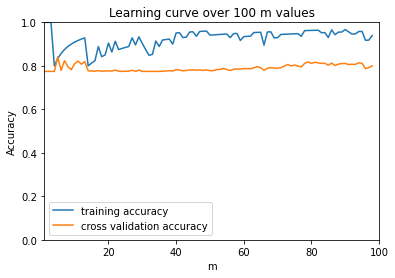

In [80]:
plt.axis([1, learning_iterations,0, 1])
plt.plot(train_acc_list, label = "training accuracy")
plt.plot(cv_acc_list, label = "cross validation accuracy")

plt.title(f"Learning curve over {learning_iterations} m values")
plt.xlabel("m")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Since the two values are slowly approaching eachother, my algorithm is overfitting and I should reduce features and increase data size! In the future I should also do some F1-Score diagnosis.

# Making specific predictions
Specific functions are set to output the probability that a user is depressed in order to account for cases where the algorithm is uncertain to allow for better graphing

In [20]:
def predict(text):
    probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

    new_text = extract_features(text)

    temp_data = np.zeros((n))


    for j in range(n):
        if (test_max[j] == 0):
            temp_data[j] = 0
        else:
            temp_data[j] = round(new_text[j] / test_max[j],4)
            
    new_text = temp_data

    new_text = (np.expand_dims(new_text,0))

    predictions_single = probability_model.predict(new_text)
    print(predictions_single)
    return (predictions_single)[0][1]

In [ ]:
classification_classes = ["Healthy","Depressed"]

message = "Hiding #depression behind a smile can make it harder to bear. RT if you can relate @look_human"
prediction = classification_classes[round(predict(message))]
print(message)
print(prediction)

message = "Hello World!"
prediction = classification_classes[round(predict(message))]
print(message)
print(prediction)

# Getting a timeline of tweets from a specific user

In [102]:
# For sending GET requests from the API
import requests
# For saving access tokens and for file management when creating and adding to the dataset
import os
# For dealing with json responses we receive from the API
import json
# For displaying the data after
import pandas as pd
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import datetime
import dateutil.parser
import unicodedata
#To add wait time between requests
import time
import tweepy
import configparser
import os

def get_tweets(username,max_tweets=100):

    config = configparser.ConfigParser()
    config.read('config.ini')

    bearer_token = os.environ['ENV_BEARER_TOKEN']

    import tweepy

    client = tweepy.Client(bearer_token=bearer_token)

    x = client.get_user(username=username)

    id = x[0]['id']


    tweets = client.get_users_tweets(id=id, tweet_fields=['context_annotations','created_at','geo'],exclude="retweets",max_results=100)

    if max_tweets > 100:
        max_results_input = 100
    else: 
        max_results_input = max_tweets

    tweet_list = []
    final_list = []
    for tweet in tweepy.Paginator(client.get_users_tweets, id=id, 
        tweet_fields=['context_annotations','created_at','geo'],
        exclude="retweets",max_results=max_results_input).flatten(limit=max_tweets):

        if tweet != None:
            tweet_list.append(tweet)

    dates_list = []
    for tweet in tweet_list:
        final_list.append(str(tweet))
        dates_list.append(((int(dict(tweet.data)['created_at'][0:4])-2020)*12)+int(dict(tweet.data)['created_at'][5:7])-3)

    return dates_list, final_list


x,y = get_tweets("barackobama",5)

# The function returns the X most recent tweets by a X user

In [23]:
print(get_tweets("barackobama",5))

([26, 26, 26, 26, 26], ["Jacob Philadelphia was five years old when he visited the Oval Office and asked if his hair was like mine. That photo became one of our favorites – a reminder of the power of seeing yourself in your leaders.\n\nToday, he's graduating from high school! Check out our recent reunion. https://t.co/gB39hFS3Wp", 'Inspired by these young leaders, @MBK_Alliance launched a Reimagining Policing Pledge for mayors and cities ready to take action. If you’re wondering how you can help make things a little better today, here are some ways to get involved: https://t.co/1E1MfT1sza', 'In the aftermath of his murder, a new generation of activists rose up to channel their anguish into organized action, launching a movement to raise awareness of systemic racism and the need for criminal justice and police reform.', 'As we grieve the children of Uvalde today, we should take time to recognize that two years have passed since the murder of George Floyd under the knee of a police offic

# Predicting tweet depressive value over time

In [76]:
from collections import Counter

depressive_probability_list = []
def over_time(username,max_tweets):
    depressive_probability_list = []
    
    one_month_to_avg_depression = {}
    
    dates, tweets = get_tweets(username,max_tweets)
    
    date_counts = Counter(dates)
    
    tweet_count = len(tweets)
    
    for idx,date in enumerate(dates):
        print(f"tweet {idx} / {tweet_count}")
        if date not in one_month_to_avg_depression:
            one_month_to_avg_depression[date] = predict(tweets[idx])
        else:
            one_month_to_avg_depression[date] += predict(tweets[idx])
    
    for date in one_month_to_avg_depression:
        one_month_to_avg_depression[date] /= date_counts[date]
    
    for date in one_month_to_avg_depression:
        depressive_probability_list.append(one_month_to_avg_depression[date])
    
    dates_input = list(set(dates))
    dates_input.sort(reverse=True)
    
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.bar(dates_input,depressive_probability_list)

    plt.title("Depressive Screening Results For Tweets Over Time")
    plt.ylabel("Probability of Depressive Tweet")
    plt.xlabel("Months Since Lockdown (March 2020)")

    plt.show()
    return dates_input, depressive_probability_list


In [ ]:
over_time("[USERHERE]",1000)

![EXAMPLE](example.png) 